# Prevendo a Satisfação dos clientes do Santander

Neste projeto treinaremos um modelo de Machine Learning, com o objetivo de prever a satisfação dos clientes do Santander

#### Relevância do projeto:
Prever a satisfação dos clientes é crucial para qualquer empresa, uma vez que o cliente é o chefe que pode demitir todos os colabordaores da empresa, inclusive o CEO.
Dessa forma, mantermos os nossos clientes satisfeitos é uma vantagem competitiva vital no mercado atual. 

#### Características gerais:
Os dados foram obtidos na plataforma do Kaggle (https://www.kaggle.com/c/santander-customer-satisfaction/data), uma vez que os mesmos foram objetos de uma competição da mesma plataforma.

O dataset é composto por:
  - 76020 instâncias
  - 371   variáveis


#### Objetivo

Objetivo do projeto é atingir uma métrica de roc_auc de 90%, utilizando modelos simples de machine learning.

#### Estratégia

Treinaremos baselines dos seguintes modelos: LogisticRegession, LDA, DecisionTree, RandomForest, Sthocastic Gradient Descent, dos quais serão escolhidos os dois melhores para serem
otimizados.


Foram utilizadas as bibliotecas do Pydata stack, tais como: Pandas Numpy e Scikit-learn. Porém, a maior parte do código foi modulado em funções e por sua vez em classes e pacote específico para esse projeto foi desenvolvido. Para acessar o código, favor acessar este link: (https://github.com/bruno154/Data_Science_Python/tree/master/Machine_Learning_Projects/Projeto_1_Santander_Customers/src)

In [1]:
#MDefinindo o diretorio de trabalho
import os
os.chdir('C:/1.Portfolio/Data_Science_Python/Machine_Learning_Projects/Projeto_1_Santander_Customers')

In [2]:
#Importação de bibliotecas
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from src.d01_Data import collect_data, load_data
from src.d02_Processing import processing_data, load_processed_data, save_processed_data
from src.d03_Modelling import model_selection, learning_curves
from src.d03_Modelling import Random_Forest
from src.d04_ModelEvaluation import class_report
from src.d04_ModelEvaluation import evaluation
from src.d05_Viz import visualization


import warnings
warnings.filterwarnings("ignore")

# Coleta de Dados
Abaixo carregamos a base de dados com 76020 instâncias (Linhas) e 371 variáveis (Colunas). 
A base não possui valores missing, no entanto, suas variáveis se encontram em escalas diferentes e fortemente desbalanciado favorecendo a classe 0 (clientes satisfeitos).  

Dessa forma, padronizaremos as escalas, o que será muito benéfico para a aplicação do algaritmo PCA para a redução da grande dimensionalidade. 

Outra medida será o balanceamento do dataset, aplicaremos a técnica SMOTE, a principal vantagem é qua a mesma cria pontos de dados sintéticos, o que diminui a propensão ao overfitting. 

In [8]:
"""
Carregando os dados de um diretório desejado.
"""

X, y, treino, teste = collect_data('train.csv', 'test.csv')

Por favor adicione o diretório onde estão os dados? C:\1.Portfolio\Data_Science_Python\Machine_Learning_Projects\Projeto_1_Santander_Customers\data\01_raw


In [9]:
"""
Checando se os dados de teste foram carregados!!!
"""
teste.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [10]:
"""
Checando se os dados de treino foram carregados!!!
"""
treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [11]:
""" Checando por valores missing - Não temos valores missing """

print(treino.isnull().values.any())
print(treino.isnull().sum().sum())
print(treino.shape)

False
0
(76020, 371)


As classes do dataset são: [0 1]




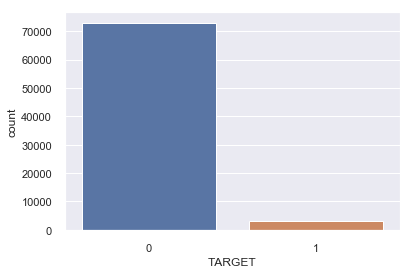

In [12]:
"""Checando a porpocinalidade da variável target
   Precisaremos balancear o nosso dataset, pois temos muitos exemplos da classe 0. """

visualization.check_balance(dados = treino,target = 'TARGET')

# Processamento dos Dados

Realizaremos o processamento dos dados preparando-os para o treinamento em três etapas:

##### 1. Balanceamento do Dataset
O desbalanceamento do dataset é um problema comum que devemos enfrentar quando trabalhamos com dados. 
O nosso dataset se encontra fortemente desbalanceado para a classe 0 - clientes satisfeitos - sendo assim, se treinarmos um modelo dessa forma, nosso modelo terá uma boa acurácia, uma vez que o modelo iria prever todos os 0 de forma correta, porém, não 'aprenderia' a prever a classe de interesse 1 - clientes insatisfeitos - devido ao baixo número de exemplos desta classe.
Aplicaremos uma técnica chamada de SMOTE para resolver este problema. 

Para detalhes sobre essa técnica, por favor acessem este link - https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb - de um excelente artigo sobre o tema.

##### 2. Aplicar escalonamento através da classe MinMaxScaler
O MinMaxScale nada mais é do que a subtração de cada elemento da variável x pelo seu menor valor (min(x)) e divisão pelo range (max(x) - min(x)) da variável. 

Xnew = x - min(X)/(max(x) - min(x))

Essa técnica não altera o shape das distribuições de dados, assim como também não altera a informação passada pelos dados originais. Essas são as principais razões da mesma ter sido escolhida.

##### 3. Aplicar redução de dimensionalidade - PCA
O PCA é um algaritmo de Machine Learning de aprendizagem não supervisionada que comprime as variáveis em componentes independentes, evitando assim a perda de informação dos dados originais. Algumas outras técnicas, como RFE, preveem a eliminação das variáveis menos importantes, acarretando na perda de informação para o modelo e eliminando também a multi-colinearidade, uma vez que os componentes são independentes entre si. 

Para mais detalhes da matemática/estatística envolvida no algaritmo favor referênciar a este artigo https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c .

In [13]:
"""
Foram executados os procediemntos abaixo:

      1. Balanciar Dataset
      2. Aplicar MinMaxScaler
      3. Aplicar a redução de dimensionalidade - PCA
"""
X_treino, X_teste, y_treino, y_teste = processing_data(X,y)

Balanciamento realizado:  [(0, 73012), (1, 73012)]
Dados Normalizados
Redução de Dimensionalidade concluída
Variância capturada de 99.24
Divisão entre dados de treino e teste concluída


In [14]:
save_processed_data(['X_treino.csv','X_teste.csv', 'y_treino.csv', 'y_teste.csv'],[X_treino, X_teste, y_treino, y_teste])

Por favor adicione o diretório de trabalho? C:\1.Portfolio\Data_Science_Python\Machine_Learning_Projects\Projeto_1_Santander_Customers\data\02_processed


Arquivos salvos


# Seleção do Modelo

Como uma primeira etapa treinamos cinco modelos, sem nenhum tunnig de parâmetros, desta etapa foram escolhidos três modelos com a maior ROCAUC, são eles:

- Regressão Logística - LR - com ROUCAUC de 0.91
- Sthocastic Gradiente Descent Classifier - SGD - com ROCAUC de 0.91
- Random Forest - RF - com ROCAUC de 0.97

Logo após, analisaremos as Learning Curves para cada modelo a fim de elegermos o modelo que irá ser otimizado.

##### 1. Regressão Logística:

O modelo de regressão logística demonstrou um comportamento relativamente estável a medida que as 'training instances' vão crescendo, variando entre 0.9130 e 0.9150 de ROCAUC, é observada também pouca diferença entre a performance sobre os dados de treino e de validação, o que indica que o modelo tem uma boa capacidade de generalização. Porém, devido a convergência das curvas durante todo o espaço de hipóteses (diferentes valores de training instances), o modelo não parece ter um espaço muito grande para evoluir a partir do range de 0.9130 e 0.9150.

##### 2. Sthocastic Gradient Descent:

O modelo sthocastic gradient descent, demonstra um comportamento mais errático como é típico do modelo, apresenta também as curvas tanto de treino quanto de validação já convergentes com uma direção lateral indicando pouco espaço de ganho de performance além do patamar apresentado. 

##### 3. Random Forest:

Já o modelo de Random Forest apresenta uma configuração diferente dos demais, as curvas estão bem espaçadas com a curva de treino em overfitting com ROCAUC 1.0 e da validação suavemente convergindo atingindo o patamar de aproxidamente 0.97(bem acima dos demais) ao final da curva. Essa configuração demonstra que caso obtivéssemos uma maior quantidade de dados convergiríamos a curva de validação à curva de treino em um patamar de ROCAUC entre 0.98 a 0.99(excelentes números), como estamos falando de dados de clientes seria uma questão de tempo para obtermos esses novos dados.
De forma mais imediata, poderíamos tentar diminuir a complexidade do modelo (realizando o tunning dos parâmetros) afim de obter um patamar mais generalizável e comparar com os demais. Dessa forma, iremos otimizar o Random Forest.

In [10]:
# Treinando diversos modelos
models = model_selection(X_treino,y_treino, X_teste, y_teste)

Dados de treino...
LR- ROCAUC: 0.9152135887401732 Std: 0.0028818360255603364
LDA- ROCAUC: 0.9093064632320382 Std: 0.0030441745337127504
CART- ROCAUC: 0.9077172324315519 Std: 0.0030523689326709333
RF- ROCAUC: 0.9789514399089854 Std: 0.0010323197464777159
SGD- ROCAUC: 0.9124802888341483 Std: 0.003261205472740063


Dados de teste...
LR- ROCAUC: 0.9155028250541097 Std: 0.002943934147163655
LDA- ROCAUC: 0.911680909092591 Std: 0.002794245980172808
CART- ROCAUC: 0.8657592191945593 Std: 0.005719730113344004
RF- ROCAUC: 0.9627923255275237 Std: 0.0025825047004325117
SGD- ROCAUC: 0.9142475773490893 Std: 0.003933838680844688


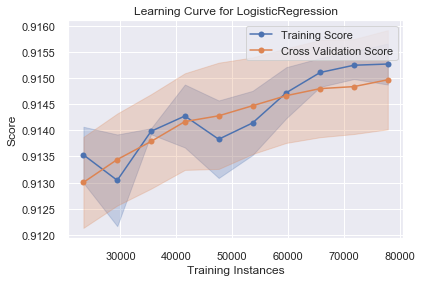

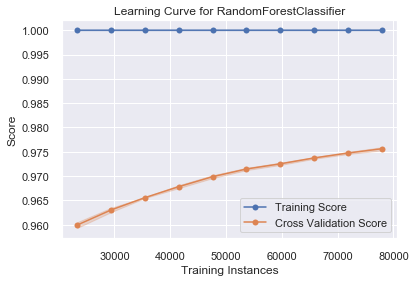

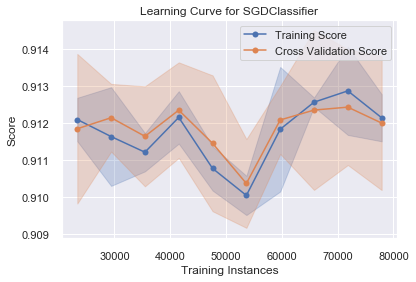

In [11]:
#Gerando as Learnings Curves dos 3 melhores modelos
models_curve = [models[0][1], models[3][1], models[4][1]]
learning_curves(models_curve, X_treino, y_treino)

# Modelagem

Utilizamos a técnica de Randomized Search para encontrar os melhores parâmetros possíveis, apessar dessa técnica não exaurir todas as possíveis combinações de parâmetros do espaço de hipóteses, como a Grid Search, ela é mais performática alcançando resultados satisfatórios em um menor intervalo de tempo.

O processo de tunning dos parâmetros, assim como o treinamento do modelo, durarão 16.5 minutos resultando em uma ROCAUC cross validada de 0.96, mesmo patamar da nossa baseline, ou seja, a técnica de Randomized Search não gerou grandes ganhos em nossa métrica de avaliação do modelo.

Abaixo iremos testar algumas hipóteses a fim de tentarmos elevar a ROCAUC, apesar de já termos alcançado o objetivo na definição do problema de 0.90.

In [15]:
# Modelando Random Forest
trained_model, _, best_params = Random_Forest.random_RF(X_treino, y_treino,5,'rf_model.sav')

> Procurando os melhores parametros...
> Fitting Modelo...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 16.5min finished


> Treinamento realizado...


In [19]:
class_report(trained_model, X_treino, y_treino, X_teste, y_teste)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     14629
           1       0.90      0.92      0.91     14576

    accuracy                           0.91     29205
   macro avg       0.91      0.91      0.91     29205
weighted avg       0.91      0.91      0.91     29205

A ROC_AUC cross-validada nos dados de treino é 0.97
A ROC_AUC cross-validada nos dados de teste é 0.96


In [20]:
#Melhores parametros
best_params

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 13,
 'criterion': 'gini'}

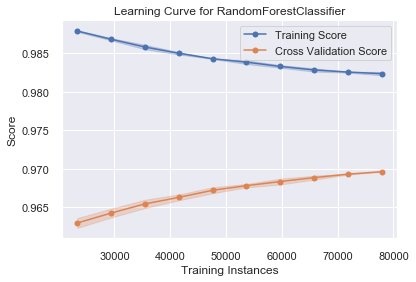

In [22]:
# Learning Curve do modelo estimado com o RandomSearch
model = [trained_model]
learning_curves(model, X_treino, y_treino)

### Alterando principais parâmetros

##### Primeira hipótese: 

Iremos testar o parametro max_depth, que representa a quantidade de camadas(profundidade) da nossa árvore de decisão.

Na hipótese nula o max_depth é igual a 13. (Valor encontrado pelo Randomized Search).

Já na hipótese alternativa iremos testar valores de 0 a 40 e avaliar a ROCAUC para cada valor do parâmetro. 

Conforme curva abaixo, podemos observar que o valor da nossa métrica se estabiliza em max_depth = 20, dessa forma atualizaremos o valor do max_depth para 20 no próximo treinamento.

##### Segunda hipótese:
Testaremos o número de estimadores, o valor encontrado pelo Randomized Search foi de 250 estimadores. 
Testando a quantidade de 200 a 1000 estimadores, observamos que a quantidade de estimadores não gera ganho algum de performance na curva de validação então iremos manter o parâmetro n_estimators em 250.


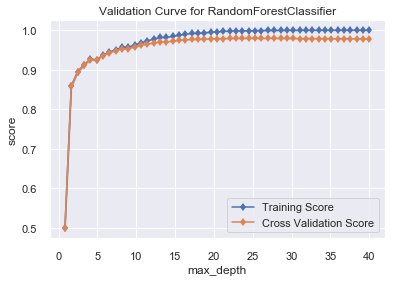

In [17]:
# Primeira Hipotese
Random_Forest.validation_curve(trained_model,X_treino, y_treino, param ='max_depth' , rang=np.linspace(0,40) , cv=5)

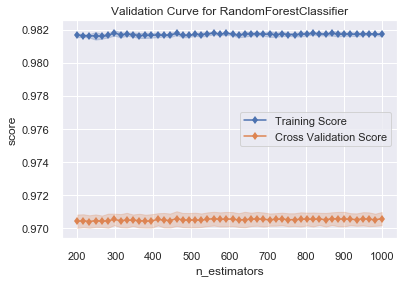

In [18]:
#Segunda Hipotese
Random_Forest.validation_curve(trained_model,X_treino, y_treino, param ='n_estimators' , rang=np.linspace(200,1000,dtype='int') , cv=5)

### Treinando modelo final

A partir dos resultados dos testes realizados acima, treinamos o nosso modelo final como os seguintes parâmetros.

- n_estimatos: 250
- max_depth: 20
- criterion: gini
- min_samples_split: 2
- min_samples_leaf: 2

Observamos a partir de uma simples observação das curvas de aprendizagem que obtivemos um pequeno ganho de 0,05 na curva de validação.

In [23]:
# Treinando modelo final
tunnig_model = Random_Forest.fitting_model_rf(X_treino,y_treino,'rf_model_final.sav',n_estimators=250, max_depth=20 ,
                               criterion='gini' , min_samples_split=2, min_samples_leaf=2)

> Treinando Modelo...


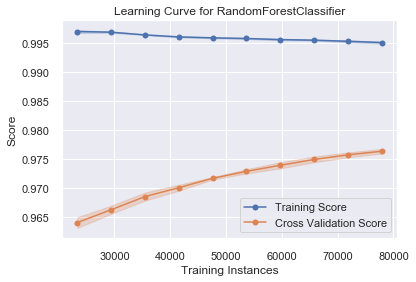

In [24]:
#Learning curve e classification report do novo modelo
model1 = [tunnig_model]
learning_curves(model1, X_treino, y_treino)

# Análise do Modelo Final

A fim de realizarmos uma análise um pouco mais profunda acerca do nosso modelo final, carregaremos e avaliaremos três métodos diferentes:

- As curvas de aprendizagem
- Matriz de confusão / Classification Report
- ROC CURVE

Primeiramente carregamos o nosso modelo final treinado, utilizando o pickle, assim como, os dados processados.  

Analisando o Classification Report em conjunto com a matriz de confusão podemos notar o bom desempenho do modelo atingindo execelentes níveis de precision (TP/TP+FP) e recall (TP/TP+FN) para ambas as classes.

A Curva de apredizagem esta idêntica a que já analisamos acima, onde alcançamos uma pequena melhora na nossa métrica de 0.05, além disso, a curva de validação esta suavimente convergindo para a curva de treino a medida que aumentamos a quantidade de instâncias de treino, ou seja, de dados.

A ROC CURVE, nada mais é que plotagem em um gráfico do TPR (True Positive Ratio) contra o FPR (False Positive Ratio), onde quanto menor a área que esta sobre a curva melhor o desempenho do modelo. Em geral, a utilização da AUC - Area Under the Curve ou ROCAUC (Nomenclatura da api do scikit se refere a métrica) é bastante difundida devida a simplicidade de entendimento do seu conceito. 

In [3]:
# Carregando o modelo 
def load_model(model):
    os.chdir(input("Qual o diretorio do modelo?"))
    file = open(model, 'rb')
    model = pickle.load(file)
    return model

model = load_model('rf_model_final.sav')

Qual o diretorio do modelo? C:\1.Portfolio\Data_Science_Python\Machine_Learning_Projects\Projeto_1_Santander_Customers\data\03_models


In [4]:
# desenvolver np.load
def load_processed_data(X_treino, y_treino, X_teste, y_teste):

    """
    :param X_treino: Arquivo com os dados de treino, variaveis independentes. str, .csv:
    :param y_treino: Arquivo com os dados de treino, variavel dependente. str, .csv
    :param X_teste:  Arquivo com os dados de teste, variaveis independentes. str, .csv: 
    :param y_teste:  Arquivo com os dados de teste, variavel dependente. str, .csv
    :return: Pandas Dataframe das variáveis X e da variável y divididos em dados de treino e teste.

    """
    path = input('Por favor adicione o diretório onde estão os dados?')
    for dirname, _, filename in os.walk(path, topdown = True):
        for filename in filename:

            if filename == X_treino:
                X = np.loadtxt(os.path.join(dirname,filename),  delimiter=',')
            elif filename == y_treino:
                Y = np.loadtxt(os.path.join(dirname,filename),  delimiter=',')
            elif filename == X_teste:
                x = np.loadtxt(os.path.join(dirname,filename),  delimiter=',')
            elif filename == y_teste:
                y = np.loadtxt(os.path.join(dirname,filename),  delimiter=',')
            else:
                pass
        print("Carregamento Finalizado!!!")


    return X,Y,x,y

X_treino, y_treino, X_teste, y_teste = load_processed_data('X_treino.csv','y_treino.csv','X_teste.csv','y_teste.csv')

Por favor adicione o diretório onde estão os dados? C:\1.Portfolio\Data_Science_Python\Machine_Learning_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento Finalizado!!!


In [5]:
#ClassReport
class_report(model,X_treino,y_treino,X_teste, y_teste)

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     14629
         1.0       0.91      0.94      0.93     14576

    accuracy                           0.92     29205
   macro avg       0.93      0.92      0.92     29205
weighted avg       0.93      0.92      0.92     29205

A ROC_AUC cross-validada nos dados de treino é 0.98
A ROC_AUC cross-validada nos dados de teste é 0.97


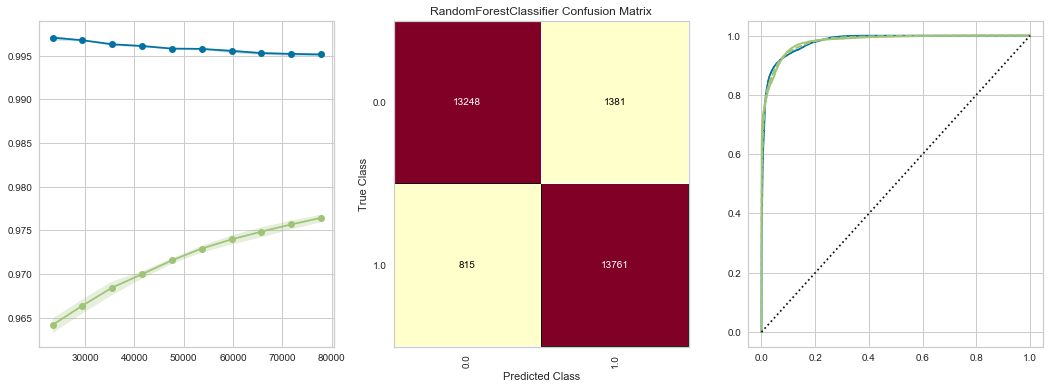

In [6]:
#Evaluation

evaluation(model,X_treino,y_treino,X_teste, y_teste)